In [33]:
import warnings
warnings.filterwarnings('ignore')
from keras import models, layers
from keras import applications

Using TensorFlow backend.


In [34]:
vgg19 = applications.VGG19()   # the default input size for this model is 224x224

In [35]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [36]:
224*224*3/25088

6.0

In [38]:
vgg19.layers.pop()
vgg19.layers.pop()
vgg19.layers.pop()
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob2 as glob
import random

glob_search_path = "cats_vs_dogs_small/train/**/*.jpg"
paths = glob.glob(glob_search_path)
print(len(paths))


path=random.choice(paths)

print(path)


2000
cats_vs_dogs_small/train/cats/cat.163.jpg


<class 'numpy.ndarray'> (224, 224, 3)


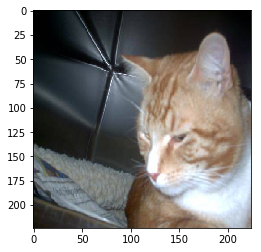

In [40]:
from PIL import Image

pic = Image.open(path)
pic = pic.resize((224,224))
pic = np.array(pic)
#pic = np.resize(pic,(224,224,3))
print(type(pic),pic.shape)

plt.imshow(pic)
plt.show()
plt.close()

In [41]:
import cv2
img = cv2.imread('messi5.jpg',0)
plt.show(img)

In [42]:
latent_vec = vgg19.predict(pic.reshape((1,224,224,3))) #reshape adding number of images

print(latent_vec)

[[6.17371256e-07 2.33587480e-06 7.35781505e-05 2.40562513e-05
  7.96699715e-06 2.94596225e-06 1.98207408e-06 3.84652481e-07
  9.07440551e-07 6.67763800e-08 1.76847095e-07 1.36173924e-07
  9.87982844e-07 1.68156282e-06 1.43392060e-06 7.75001979e-07
  5.81389827e-07 7.57655798e-05 2.30254841e-06 3.22193068e-06
  1.86742784e-06 4.41332304e-07 8.25862543e-08 5.19707669e-07
  1.66901074e-07 1.31609914e-08 5.14105949e-08 1.17025483e-08
  4.98162187e-08 1.39161114e-06 7.59671479e-07 7.72663270e-07
  6.83260453e-08 1.53650728e-06 2.05998344e-06 3.60128325e-07
  3.78787422e-06 4.05976550e-07 7.64430510e-08 4.33355171e-06
  9.10061317e-07 2.06584915e-07 4.03575086e-07 3.97326039e-06
  4.39820553e-07 6.13240729e-07 2.90610637e-06 7.59938132e-07
  1.68699842e-06 6.04739725e-08 1.26229850e-07 8.20414698e-06
  2.98918991e-07 6.19113720e-08 5.32973729e-07 8.37327491e-07
  1.29894332e-07 1.59168145e-08 1.40968993e-07 3.10463037e-07
  7.31261139e-07 4.80187396e-07 7.32232479e-07 3.19595358e-07
  1.1584

In [43]:
!pwd

/home/nacho/Desktop/DSR/Tristan second week


In [46]:
vgg19 = applications.VGG19(include_top = False, input_shape = (224,224,3))
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [47]:
latent_vec = vgg19.predict(pic.reshape((1,224,224,3))) #reshape adding number of images

print(latent_vec.flatten().shape)

(25088,)


In [ ]:
# structure latent space

